In [1]:
# !pip install wordcloud

In [105]:
import warnings
import string
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.font_manager import FontProperties

In [106]:
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [107]:
data =  pd.read_csv('data/custom/DATA_SEM_RT_VACINAS_PT.csv', lineterminator='\n')

### **Helper Functions**

In [108]:
def make_world_cloud(all_summary = None, 
                     this_width = 2000, 
                     this_height = 1050,
                     colorswd='Blues',
                     num_words = 500):
    
    this_all_summary = " ".join(all_summary)
    
    return WordCloud(stopwords=set(STOPWORDS),
                     collocations=False,
                     background_color="white",
                     max_words=num_words,
                     width=this_width,
                     margin=2,
                     max_font_size=200,
                     colormap=colorswd,
                     height=this_height).generate(this_all_summary)

def plot_world_cloud(wordcloud = None, 
                     this_height = 15,
                     this_width = 8,
                     fig_file_name = "fig_none"):
    
    plt.figure(figsize=(this_height, this_width))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    return wordcloud.to_file(fig_file_name + ".pdf")

def clean_spaces_text(text):
    tmp = list(map(lambda x:  x if x != ' ' or x not in printable else None, text.split()))
    return " ".join(tmp)

In [109]:
data.date.value_counts()

2021-07-15    43271
2021-07-16    39925
2021-07-14    12188
Name: date, dtype: int64

### Visualizando do início ao fim do disaster

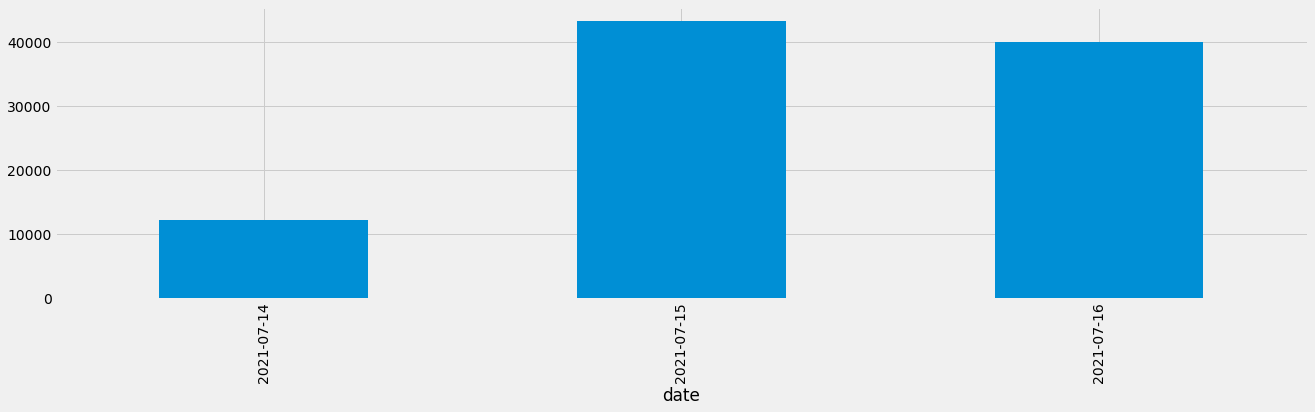

In [110]:
plt.figure(figsize = (20, 5))
data.groupby('date')['text']\
    .count()\
    .plot.bar();

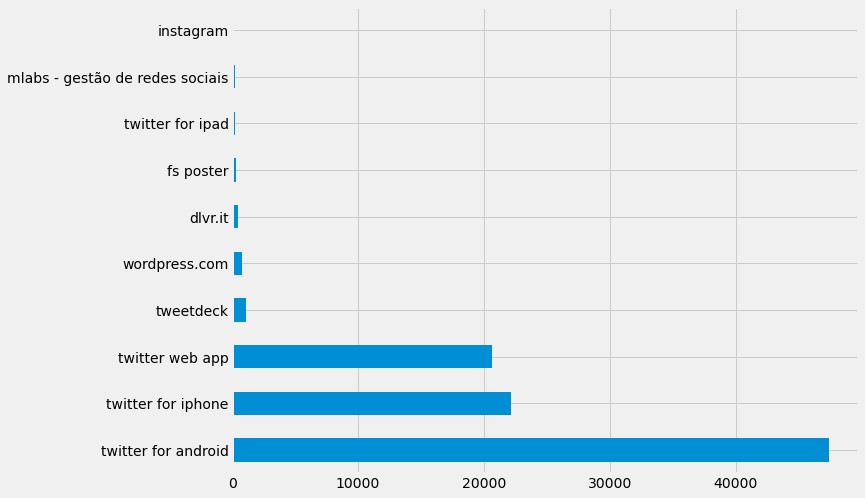

In [111]:
plt.figure(figsize = (10, 8))
data.source_device\
    .value_counts()[:10]\
    .plot.barh();

In [112]:
data

,id,location,lang,text,date,time,source_device
0,1415385897701421057,Brazil,pt,A terceira dose da vacina do Corona não é igua...,2021-07-14,19:01:09,twitter web app
1,1415385908719898625,Porto Alegre - RS,pt,Já foi escolhido meu traje para essa ocasião d...,2021-07-14,19:01:11,twitter for iphone
2,1415385917213319171,Apartment 402,pt,o poder da gata,2021-07-14,19:01:13,twitter web app
3,1415385926981898242,"Guarulhos, Brasil",pt,"Com avanço da vacinação, SP registra queda de ...",2021-07-14,19:01:16,blog2social app
4,1415385940730777609,Canguaretama/RN-Brasil,pt,RESULTADO DA VACINA!! Pela Primeira Vez Desde ...,2021-07-14,19:01:19,hootsuite inc.
...,...,...,...,...,...,...,...
95379,1416155997513605122,"Here, there, everywhere",pt,CRF: Covas Rasas do Flamengo,2021-07-16,22:01:15,twitter for android
95380,1416156002563538944,"Manaus, Brasil",pt,Não ESCAPA UM !!!,2021-07-16,22:01:16,twitter web app
95381,1416156003486343171,🥢,pt,@camarguitosssss @davisonex n tomou a vacina p...,2021-07-16,22:01:16,twitter for iphone
95382,1416156008150441986,NaN,pt,"Melhor é as conversas de agr:""Mas então, tu fe...",2021-07-16,22:01:17,twitter for android


In [113]:
data['text_lower'] = data.text.apply(lambda x: x.lower())

### Removendo Texto Duplicado

In [114]:
def filters_split_tri_gram(text):
    return " ".join(text.split()[:3])

def filters_split_hash(text):
    return text.split('#')[0]

def filters_split_http(text):
    return text.split('http')[0]

In [115]:
data = data[-data.text_lower.duplicated()]

#### Trigram

In [116]:
data.text_lower = data.text_lower.apply(lambda x: filters_split_tri_gram(x))
data = data[-data.text_lower.duplicated()]

In [117]:
data

,id,location,lang,text,date,time,source_device,text_lower
0,1415385897701421057,Brazil,pt,A terceira dose da vacina do Corona não é igua...,2021-07-14,19:01:09,twitter web app,a terceira dose
1,1415385908719898625,Porto Alegre - RS,pt,Já foi escolhido meu traje para essa ocasião d...,2021-07-14,19:01:11,twitter for iphone,já foi escolhido
2,1415385917213319171,Apartment 402,pt,o poder da gata,2021-07-14,19:01:13,twitter web app,o poder da
3,1415385926981898242,"Guarulhos, Brasil",pt,"Com avanço da vacinação, SP registra queda de ...",2021-07-14,19:01:16,blog2social app,com avanço da
4,1415385940730777609,Canguaretama/RN-Brasil,pt,RESULTADO DA VACINA!! Pela Primeira Vez Desde ...,2021-07-14,19:01:19,hootsuite inc.,resultado da vacina!!
...,...,...,...,...,...,...,...,...
95377,1416155993872928777,"Newark, NJ",pt,@marlbo51028429 @FredVianaLeite @jairbolsonaro...,2021-07-16,22:01:14,twitter for iphone,@marlbo51028429 @fredvianaleite @jairbolsonaro
95379,1416155997513605122,"Here, there, everywhere",pt,CRF: Covas Rasas do Flamengo,2021-07-16,22:01:15,twitter for android,crf: covas rasas
95380,1416156002563538944,"Manaus, Brasil",pt,Não ESCAPA UM !!!,2021-07-16,22:01:16,twitter web app,não escapa um
95381,1416156003486343171,🥢,pt,@camarguitosssss @davisonex n tomou a vacina p...,2021-07-16,22:01:16,twitter for iphone,@camarguitosssss @davisonex n


#### RT Hash

In [118]:
data.text_lower = data.text.apply(lambda x: x.lower())
data.text_lower = data.text_lower.apply(lambda x: filters_split_hash(x))
data = data[-data.text_lower.duplicated()]

In [119]:
data

,id,location,lang,text,date,time,source_device,text_lower
0,1415385897701421057,Brazil,pt,A terceira dose da vacina do Corona não é igua...,2021-07-14,19:01:09,twitter web app,a terceira dose da vacina do corona não é igua...
1,1415385908719898625,Porto Alegre - RS,pt,Já foi escolhido meu traje para essa ocasião d...,2021-07-14,19:01:11,twitter for iphone,já foi escolhido meu traje para essa ocasião d...
2,1415385917213319171,Apartment 402,pt,o poder da gata,2021-07-14,19:01:13,twitter web app,o poder da gata
3,1415385926981898242,"Guarulhos, Brasil",pt,"Com avanço da vacinação, SP registra queda de ...",2021-07-14,19:01:16,blog2social app,"com avanço da vacinação, sp registra queda de ..."
4,1415385940730777609,Canguaretama/RN-Brasil,pt,RESULTADO DA VACINA!! Pela Primeira Vez Desde ...,2021-07-14,19:01:19,hootsuite inc.,resultado da vacina!! pela primeira vez desde ...
...,...,...,...,...,...,...,...,...
95377,1416155993872928777,"Newark, NJ",pt,@marlbo51028429 @FredVianaLeite @jairbolsonaro...,2021-07-16,22:01:14,twitter for iphone,@marlbo51028429 @fredvianaleite @jairbolsonaro...
95379,1416155997513605122,"Here, there, everywhere",pt,CRF: Covas Rasas do Flamengo,2021-07-16,22:01:15,twitter for android,crf: covas rasas do flamengo
95380,1416156002563538944,"Manaus, Brasil",pt,Não ESCAPA UM !!!,2021-07-16,22:01:16,twitter web app,não escapa um !!!
95381,1416156003486343171,🥢,pt,@camarguitosssss @davisonex n tomou a vacina p...,2021-07-16,22:01:16,twitter for iphone,@camarguitosssss @davisonex n tomou a vacina p...


In [120]:
data.text_lower = data.text.apply(lambda x: x.lower())
data = data[-data.text_lower.str.contains('rt @')]

In [121]:
data

,id,location,lang,text,date,time,source_device,text_lower
0,1415385897701421057,Brazil,pt,A terceira dose da vacina do Corona não é igua...,2021-07-14,19:01:09,twitter web app,a terceira dose da vacina do corona não é igua...
1,1415385908719898625,Porto Alegre - RS,pt,Já foi escolhido meu traje para essa ocasião d...,2021-07-14,19:01:11,twitter for iphone,já foi escolhido meu traje para essa ocasião d...
2,1415385917213319171,Apartment 402,pt,o poder da gata,2021-07-14,19:01:13,twitter web app,o poder da gata
3,1415385926981898242,"Guarulhos, Brasil",pt,"Com avanço da vacinação, SP registra queda de ...",2021-07-14,19:01:16,blog2social app,"com avanço da vacinação, sp registra queda de ..."
4,1415385940730777609,Canguaretama/RN-Brasil,pt,RESULTADO DA VACINA!! Pela Primeira Vez Desde ...,2021-07-14,19:01:19,hootsuite inc.,resultado da vacina!! pela primeira vez desde ...
...,...,...,...,...,...,...,...,...
95377,1416155993872928777,"Newark, NJ",pt,@marlbo51028429 @FredVianaLeite @jairbolsonaro...,2021-07-16,22:01:14,twitter for iphone,@marlbo51028429 @fredvianaleite @jairbolsonaro...
95379,1416155997513605122,"Here, there, everywhere",pt,CRF: Covas Rasas do Flamengo,2021-07-16,22:01:15,twitter for android,crf: covas rasas do flamengo
95380,1416156002563538944,"Manaus, Brasil",pt,Não ESCAPA UM !!!,2021-07-16,22:01:16,twitter web app,não escapa um !!!
95381,1416156003486343171,🥢,pt,@camarguitosssss @davisonex n tomou a vacina p...,2021-07-16,22:01:16,twitter for iphone,@camarguitosssss @davisonex n tomou a vacina p...


### Removendo Tweets muito pequenos 

In [132]:
query_tweet_min = \
data.text_lower.apply(lambda x: len(x.split()) <= 5)
data = data[-query_tweet_min]

# **ROI**

In [139]:
def contains_that(word):
    return data[data\
            .text_lower\
            .str\
            .contains(word)]['text']

In [153]:
contains_that('nome da vacina ')

7466     @Leticia81372766 @bolsomito_2 NO BRASIL TEMOS,...
14711    @prefeituradegyn Antes de entregar a senha inf...
23678    Tô indo acompanhar meu pai que vai tomar a seg...
25532    @rosana Covishield é o nome da vacina da Astra...
25690    @oatila Por que na foto o Átila cobriu o nome ...
26400    @maristelademelo @oatila nome da vacina é "vac...
30185    tapou o nome da vacina pra não encherem a porr...
30438    amo todas as pessoas que tiram o nome da vacin...
30754    @v1_jju @_Dan_SPFC Ué,  ele tapou o nome da va...
30909       @g1 @oatila Cobriu o nome da vacina na foto...
31341    @OLulaEstaPreso Esse porco tampou o nome da va...
33612     Tampando o nome da vacina ao vivaço?Hahahahahaha
33737    @oatila ta escondendo o nome da vacina por que...
33891                @oatila Mostra o nome da vacina aí...
34235    @oatila Hahahhah.... escondeu o nome da VACINA...
34600    @taoquei1 O nome da vacina eficiente é IVERMEC...
34943           @oatila Tampando o nome da vacina Por qu

In [149]:
contains_that('vacina')

0        A terceira dose da vacina do Corona não é igua...
1        Já foi escolhido meu traje para essa ocasião d...
3        Com avanço da vacinação, SP registra queda de ...
4        RESULTADO DA VACINA!! Pela Primeira Vez Desde ...
5                  Não vou tomar crlh de vacina nenhuma ..
                               ...                        
95372    A alegria da criança ao receber a vacina..... ...
95374    @giovelibertatem ta provado entao que dinheiro...
95377    @marlbo51028429 @FredVianaLeite @jairbolsonaro...
95381    @camarguitosssss @davisonex n tomou a vacina p...
95382    Melhor é as conversas de agr:"Mas então, tu fe...
Name: text, Length: 50854, dtype: object

### **Contexto**

In [188]:
query = data[data.text_lower.str.contains('ceara')]

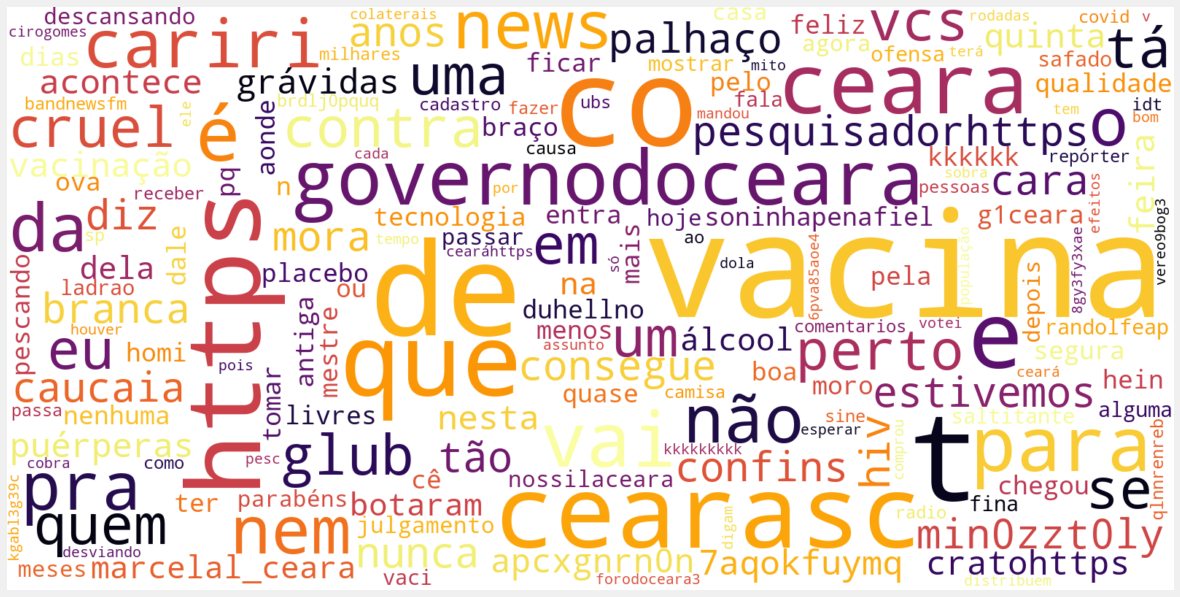

In [189]:
wordcloud = make_world_cloud(all_summary=query.text_lower,
                             this_width=1600,
                             this_height=800,
                             colorswd='inferno',
                             num_words=300)

plot_world_cloud(wordcloud=wordcloud,
                 this_height=20,
                 this_width=10,
                 fig_file_name='org_wc')

In [190]:
data

,id,location,lang,text,date,time,source_device,text_lower
0,1415385897701421057,Brazil,pt,A terceira dose da vacina do Corona não é igua...,2021-07-14,19:01:09,twitter web app,a terceira dose da vacina do corona não é igua...
1,1415385908719898625,Porto Alegre - RS,pt,Já foi escolhido meu traje para essa ocasião d...,2021-07-14,19:01:11,twitter for iphone,já foi escolhido meu traje para essa ocasião d...
3,1415385926981898242,"Guarulhos, Brasil",pt,"Com avanço da vacinação, SP registra queda de ...",2021-07-14,19:01:16,blog2social app,"com avanço da vacinação, sp registra queda de ..."
4,1415385940730777609,Canguaretama/RN-Brasil,pt,RESULTADO DA VACINA!! Pela Primeira Vez Desde ...,2021-07-14,19:01:19,hootsuite inc.,resultado da vacina!! pela primeira vez desde ...
5,1415385950285336580,🧜🏼‍♀️🐚🌊,pt,Não vou tomar crlh de vacina nenhuma ..,2021-07-14,19:01:21,twitter for android,não vou tomar crlh de vacina nenhuma ..
...,...,...,...,...,...,...,...,...
95375,1416155982242230274,NaN,pt,"DE NOVO agora no NE2, bicho. Que cinismo da Gl...",2021-07-16,22:01:11,twitter for iphone,"de novo agora no ne2, bicho. que cinismo da gl..."
95376,1416155988109955072,NaN,pt,para o bem da humanidade o Flamengo precisa de...,2021-07-16,22:01:13,twitter for android,para o bem da humanidade o flamengo precisa de...
95377,1416155993872928777,"Newark, NJ",pt,@marlbo51028429 @FredVianaLeite @jairbolsonaro...,2021-07-16,22:01:14,twitter for iphone,@marlbo51028429 @fredvianaleite @jairbolsonaro...
95381,1416156003486343171,🥢,pt,@camarguitosssss @davisonex n tomou a vacina p...,2021-07-16,22:01:16,twitter for iphone,@camarguitosssss @davisonex n tomou a vacina p...


In [192]:
data.to_csv("VACINAS_PT_BR.csv",  index=None)